In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
from brokenaxes import brokenaxes

plt.style.use('tableau-colorblind10')

def _legend(handles, labels, kwargs):
    # Define number of columns
    ncol = kwargs["ncol"]
    nrows = int(np.ceil(len(labels) / ncol))  # Calculate rows needed

    def reorder_list(lst, cols=ncol):
        """Rearrange the list to ensure proper column-to-row transformation."""
        result = [[] for _ in range(cols)]  
        for i, val in enumerate(lst):
            result[i % cols].append(val)  
        return [val for sublist in result for val in sublist]

    # Apply legend with row-first order
    plt.legend(reorder_list(handles), reorder_list(labels), **kwargs)


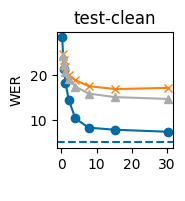

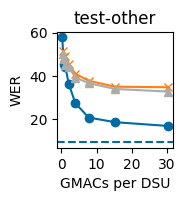

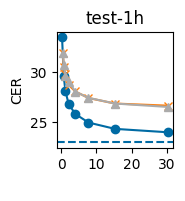

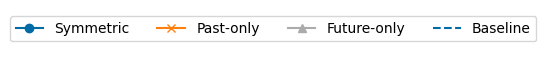

In [3]:
df_sym = pd.read_csv(StringIO("""test-clean	test-other	test-1h
28.37	57.84	33.49
21.4	45.76	29.66
18.25	43.96	28.15
14.43	36.21	26.84
10.35	27.39	25.85
8.3	20.76	24.99
7.83	18.6	24.36
7.39	16.85	24.02"""), sep="\t")

df_past = pd.read_csv(StringIO("""test-clean	test-other	test-1h
24.59	51.42	31.91
23.39	49	30.58
21.7	49.24	29.8
20.02	45.73	28.75
18.86	41.03	28.1
17.54	37.82	27.44
16.88	35.04	26.89
17.15	34.79	26.68"""), sep="\t")

df_future = pd.read_csv(StringIO("""test-clean	test-other	test-1h
24.2	50.39	31.95
22.23	47.84	30.73
20.73	45.08	29.65
19.16	44.09	29.09
17.45	39.29	28.08
15.88	36.72	27.46
15.1	33.99	26.89
14.69	32.77	26.55"""), sep="\t")

metric = {"test-clean": "WER", "test-other": "WER", "test-1h": "CER"}
baseline = {"test-clean": 5, "test-other": 9.2, "test-1h": 23}
gmacs = np.array([int(x) for x in "251684480	486238464	720792448	1189900416	2128116352	4004548224	7757411968	15263139456	30274594432".split("\t")])

for i, dataset in enumerate("test-clean	test-other	test-1h".split()):
    plt.figure(figsize=(1.5, 1.5))
    plt.title(dataset)

    plt.plot(np.concatenate([gmacs[0:1], gmacs[2:]]) / (10**9), df_sym[dataset], "o-", label="Symmetric")
    plt.plot(gmacs[1:] / (10**9), df_past[dataset], "x-", label="Past-only")
    plt.plot(gmacs[1:] / (10**9), df_future[dataset], "^-", label="Future-only")

    plt.axhline(baseline[dataset], ls="--", label="Baseline")
    plt.ylabel(metric[dataset])
    plt.xlabel("GMACs per DSU" if i == 1 else "⠀")
    plt.xticks([0, 10, 20, 30])

    plt.savefig(f"window-{dataset}.pdf", bbox_inches="tight", transparent=True)

# Create a new figure for the legend
legends = plt.gca().get_legend_handles_labels()
plt.figure(figsize=(4, 0.5))  # Create a separate figure
# Recreate the legend in the new figure
plt.legend(*legends, loc='center', ncol=4)
plt.axis('off')  # Turn off axes for the legend plot
plt.savefig(f"window-legend.pdf", bbox_inches="tight", transparent=True)

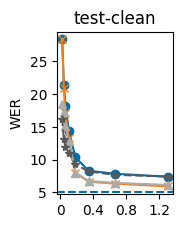

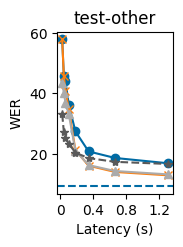

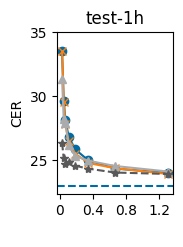

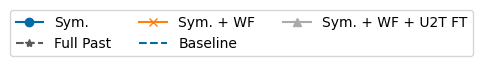

In [2]:
df_sym = pd.read_csv(StringIO("""test-clean	test-other	test-1h
28.37	57.84	33.49
21.4	45.76	29.66
18.25	43.96	28.15
14.43	36.21	26.84
10.35	27.39	25.85
8.3	20.76	24.99
7.83	18.6	24.36
7.39	16.85	24.02"""), sep="\t")

df_weighted = pd.read_csv(StringIO("""test-clean	test-other	test-1h
28.37	57.84	33.49
20.91	45.66	29.57
17.07	40.83	27.82
13.23	34.81	26.47
7.96	21.24	25.52
6.63	16.04	24.79
6.32	13.97	24.39
5.91	12.86	23.94"""), sep="\t")

df_w_ft = pd.read_csv(StringIO("""test-clean	test-other	test-1h
18.45	43.36	31.36
17.23	40.24	28.19
15.15	36.79	27.93
12.82	33.04	26.18
8.02	21.03	25.34
6.72	16.24	24.97
6.45	14.28	24.56
6.12	13.17	24.13"""), sep="\t")

df_fut = pd.read_csv(StringIO("""test-clean	test-other	test-1h
16.28	33.12	26.38
13.08	27.26	25.16
11.94	25.09	24.7
11.01	23.35	24.85
9.27	20.34	24.58
8.2	18.55	24.35
7.67	17.32	24.05
7.41	16.62	23.94"""), sep="\t")

metric = {"test-clean": "WER", "test-other": "WER", "test-1h": "CER"}
baseline = {"test-clean": 5, "test-other": 9.2, "test-1h": 23}
latencies = np.array([int(x) for x in """25
45
65
105
185
345
665
1305""".split("\n")])

for i, dataset in enumerate("test-clean	test-other	test-1h".split()):
    plt.figure(figsize=(1.5, 2.1))
    plt.title(dataset)

    plt.plot(latencies, df_sym[dataset], "o-", label="Sym.")
    plt.plot(latencies, df_weighted[dataset], "x-", label="Sym. + WF")
    plt.plot(latencies, df_w_ft[dataset], "^-", label="Sym. + WF + U2T FT")

    mask = df_fut[dataset] > 0
    plt.plot(latencies[mask], df_fut[dataset][mask], "*--", label="Full Past")
    plt.axhline(baseline[dataset], ls="--", label="Baseline")
    plt.ylabel(metric[dataset])

    plt.xlabel("Latency (s)" if i == 1 else "⠀")
    plt.xticks([0, 400, 800, 1200], [0, 0.4, 0.8, 1.2])
    if dataset == "test-1h":
        plt.ylim(22.4, 35)
    plt.savefig(f"window-sota-{dataset}.pdf", bbox_inches="tight", transparent=True)

# Create a new figure for the legend
legends = plt.gca().get_legend_handles_labels()
plt.figure(figsize=(4, 0.5))  # Create a separate figure
# Recreate the legend in the new figure
_legend(*legends, {"loc": "center", "ncol": 3})
plt.axis('off')  # Turn off axes for the legend plot
plt.savefig(f"window-sota-legend.pdf", bbox_inches="tight", transparent=True)

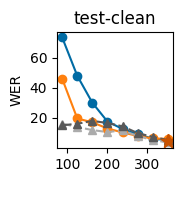

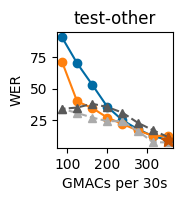

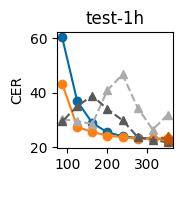

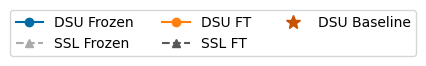

In [6]:
df_fc = pd.read_csv(StringIO("""test-clean	test-other	test-1h
5.11	9.41	23.08
6.3	12.51	23.23
9.03	17.98	23.4
12.67	24.99	24.09
17.56	35.6	25.51
29.99	53.02	28.89
47.87	69.99	36.85
73.29	90.42	60.26"""), sep="\t")

df_ft = pd.read_csv(StringIO("""test-clean	test-other	test-1h
6.11	12.35	23.26
6.34	12.85	23.1
8	16.88	23.21
10.37	22.06	23.72
12.96	26.99	24.31
17.05	34.7	25.63
19.6	39.8	27.48
45.94	71.13	43.35"""), sep="\t")

df_sslft = pd.read_csv(StringIO("""test-clean	test-other	test-1h
5.3	11.8	21.8
7.4	17.2	22.8
9.9	23.1	23.8
14.4	31	29.9
16.6	35.4	34
18	38	38.9
16.1	35	35.1
15.1	34	29.5"""), sep="\t")

df_ssl = pd.read_csv(StringIO("""test-clean	test-other	test-1h
3.7	7.4	32
5.3	7.7	26.5
8	16.7	34.5
11.7	24.3	46.7
10.6	24.2	41
11.9	27.1	28.6
14	30.7	29.6
16.1	34	30.3"""), sep="\t")

metric = {"test-clean": "WER", "test-other": "WER", "test-1h": "CER"}
baseline = {"test-clean": 5, "test-other": 9.2, "test-1h": 23}
gmacs = np.array([int(x) for x in """351649760128
313856540416
276063320704
238270100992
200476881280
162683661568
124890441856
87097222144""".split("\n")])

for i, dataset in enumerate("test-clean	test-other	test-1h".split()):
    plt.figure(figsize=(1.5, 1.5))
    plt.title(dataset)

    plt.plot(gmacs / (10**9), df_fc[dataset], "o-", label="DSU Frozen")
    plt.plot(gmacs / (10**9), df_ft[dataset], "o-", label="DSU FT")
    plt.plot([351649760128 / (10**9)], [baseline[dataset]], "*", markersize=10, label="DSU Baseline", c="C5")

    plt.plot(gmacs / (10**9), df_ssl[dataset], "^--", label="SSL Frozen")
    plt.plot(gmacs / (10**9), df_sslft[dataset], "^--", label="SSL FT")

    # plot baseline once more for better visibility
    plt.plot([351649760128 / (10**9)], [baseline[dataset]], "*", markersize=10,  c="C5")

    plt.ylabel(metric[dataset])

    plt.xlabel("GMACs per 30s" if i == 1 else "⠀")
    # if i == 0:
    #     plt.legend()
    plt.savefig(f"layer-{dataset}.pdf", bbox_inches="tight", transparent=True)

# Create a new figure for the legend
legends = plt.gca().get_legend_handles_labels()
plt.figure(figsize=(4, 0.5))  # Create a separate figure
# Recreate the legend in the new figure
_legend(*legends, {"loc": "center", "ncol": 3})
plt.axis('off')  # Turn off axes for the legend plot
plt.savefig(f"layer-legend.pdf", bbox_inches="tight", transparent=True)

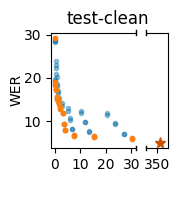

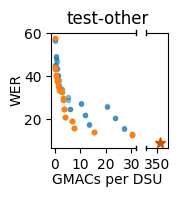

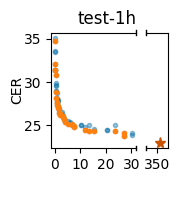

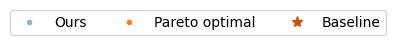

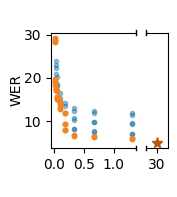

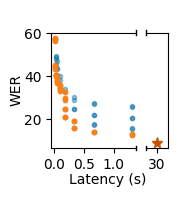

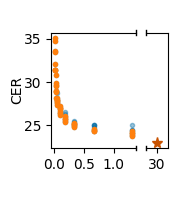

In [9]:
df_points = pd.read_csv(StringIO("""test-clean	test-other	test-1h	macs	lat
28.81	56.55	35.1	251684480	25
20.91	45.66	29.57	720792448	45
17.07	40.83	27.82	1189900416	65
13.23	34.81	26.47	2128116352	105
7.96	21.24	25.52	4004548224	185
6.63	16.04	24.79	7757411968	345
6.32	13.97	24.39	15263139456	665
5.91	12.86	23.94	30274594432	1305
28.45	57.28	33.48	226472192	25
22.37	48	29.66	645155584	45
18.21	43.61	27.96	1063838976	65
14.36	35.94	26.66	1901205760	105
9.32	24.81	25.7	3575939328	185
8.09	19.52	25.09	6925406464	345
7.39	17.59	24.39	13624340736	665
6.92	15.71	24.1	27022209280	1305
28.63	57.35	33.54	201259904	25
23.09	49.32	29.91	569518720	45
18.52	43.81	28.17	937777536	65
15.3	38.43	26.93	1674295168	105
11.9	29.92	25.91	3147330432	185
10.62	25.09	25.28	6093400960	345
9.9	22.18	24.52	11985542016	665
9.43	20.82	24.36	23769824128	1305
29.32	57.95	34.77	176047616	25
23.82	48.84	30.77	493881856	45
20.27	47.22	28.75	811716096	65
16.55	40.36	27.24	1447384576	105
14.18	34.35	26.29	2718721536	185
13.04	30.58	25.49	5261395456	345
12.36	27.5	25.02	10346743296	665
11.92	26.21	24.52	20517438976	1305
18.45	43.36	31.36	251684480	25
17.23	40.24	28.19	720792448	45
15.15	36.79	27.93	1189900416	65
12.82	33.04	26.18	2128116352	105
8.02	21.03	25.34	4004548224	185
6.72	16.24	24.97	7757411968	345
6.45	14.28	24.56	15263139456	665
6.12	13.17	24.13	30274594432	1305
19.34	44.96	31.33	226472192	25
17.11	40.86	28.96	645155584	45
15.18	37.84	27.37	1063838976	65
14	33.75	27.02	1901205760	105
9.37	24.83	25.76	3575939328	185
8.08	19.45	25.15	6925406464	345
7.76	17.85	25.02	13624340736	665
6.97	15.88	23.82	27022209280	1305
19.7	45.2	31.37	201259904	25
17.48	40.7	29	569518720	45
15.57	37.85	27.61	937777536	65
14.17	34.81	26.47	1674295168	105
11.98	29.16	26.1	3147330432	185
10.21	24.65	25.35	6093400960	345
9.91	22.18	24.87	11985542016	665
9.6	20.58	25.04	23769824128	1305
19.01	44.19	32.05	176047616	25
17.42	40.54	28.87	493881856	45
15.69	38.7	27.64	811716096	65
14.6	35.54	26.95	1447384576	105
13.54	32.64	26.58	2718721536	185
12.43	29.28	25.17	5261395456	345
11.79	27.19	25.05	10346743296	665
11.5	25.63	24.5	20517438976	1305"""), sep="\t")


metric = {"test-clean": "WER", "test-other": "WER", "test-1h": "CER"}
baseline = {"test-clean": 5, "test-other": 9.2, "test-1h": 23}


def is_pareto(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs[:i]>=c, axis=1)) and np.all(np.any(costs[i+1:]>=c, axis=1))
    return is_efficient


for i, dataset in enumerate("test-clean	test-other	test-1h".split()):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(1.5, 1.5), gridspec_kw={'width_ratios': [4, 1]})

    plt.suptitle(dataset, y=1.03)
    ax1.plot(df_points["macs"] / (10**9), df_points[dataset], ".", alpha=0.4, label="Ours")

    pareto = is_pareto(df_points[[dataset, "macs"]].to_numpy())
    ax1.plot(df_points["macs"][pareto] / (10**9), df_points[dataset][pareto], ".", label="Pareto optimal")
    ax1.set_xticks([0, 10, 20, 30])

    ax2.plot([351649760128 / (10**9)], [baseline[dataset]], "*", markersize=8, label="Baseline", c="C5")
    ax2.set_xlim(345, 355)
    ax2.set_xticks([350])
    # ax1.set_ylabel(metric[dataset], x=-4)

    fig.supylabel(metric[dataset], x=-0.15, fontsize=10)
    fig.supxlabel("GMACs per DSU" if i == 1 else "⠀", y=-0.15, fontsize=10)
    # fig.legend(loc="upper center", bbox_to_anchor=(0.65, 0.85), ncol=1)
    # if i == 0:

    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax1.yaxis.tick_left()
    ax2.yaxis.tick_right()
    ax2.yaxis.set_ticks_position('none')  # Remove right ticks from ax2

    # Add diagonal break markers using Axes coordinates
    d = 0.01  # Adjust diagonal marker size
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, lw=1)
    ax1.plot((1, 1), (-2 * d, + 2 * d), **kwargs)
    ax1.plot((1, 1), (1 -2 * d, 1 + 2 * d), **kwargs)
    kwargs.update(transform=ax2.transAxes)  
    ax2.plot((0, 0), (-2 * d, + 2 * d), **kwargs)
    ax2.plot((0, 0), (1-2 * d, 1+ 2 * d), **kwargs)
    plt.savefig(f"pareto-{dataset}.pdf", bbox_inches="tight", transparent=True)

# Create a new figure for the legend
handles, labels = [], []
for ax in (ax1, ax2):
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

plt.figure(figsize=(4, 0.3))  # Create a separate figure
# Recreate the legend in the new figure
plt.legend(handles, labels, loc='center', ncol=3)
plt.axis('off')  # Turn off axes for the legend plot
plt.savefig(f"pareto-legend.pdf", bbox_inches="tight", transparent=True)



for i, dataset in enumerate("test-clean	test-other	test-1h".split()):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(1.5, 1.5), gridspec_kw={'width_ratios': [4, 1]})

    plt.suptitle("⠀", y=1.03)
    ax1.plot(df_points["lat"] / (1000), df_points[dataset], ".", alpha=0.4, label="Ours")

    pareto = is_pareto(df_points[[dataset, "lat"]].to_numpy())
    ax1.plot(df_points["lat"][pareto] / (1000), df_points[dataset][pareto], ".", label="Pareto optimal")
    ax1.set_xticks([0, 0.5, 1.0, 1.5])

    ax2.plot([30], [baseline[dataset]], "*", markersize=8, label="Baseline", c="C5")
    ax2.set_xlim(29, 31)
    ax2.set_xticks([30])
    # ax1.set_ylabel(metric[dataset], x=-4)

    fig.supylabel(metric[dataset], x=-0.15, fontsize=10)
    fig.supxlabel("Latency (s)" if i == 1 else "⠀", y=-0.15, fontsize=10)
    # fig.legend(loc="upper center", bbox_to_anchor=(0.65, 0.85), ncol=1)
    # if i == 0:

    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax1.yaxis.tick_left()
    ax2.yaxis.tick_right()
    ax2.yaxis.set_ticks_position('none')  # Remove right ticks from ax2

    # Add diagonal break markers using Axes coordinates
    d = 0.01  # Adjust diagonal marker size
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, lw=1)
    ax1.plot((1, 1), (-2 * d, + 2 * d), **kwargs)
    ax1.plot((1, 1), (1 -2 * d, 1 + 2 * d), **kwargs)
    kwargs.update(transform=ax2.transAxes)  
    ax2.plot((0, 0), (-2 * d, + 2 * d), **kwargs)
    ax2.plot((0, 0), (1-2 * d, 1+ 2 * d), **kwargs)
    plt.savefig(f"pareto-latency-{dataset}.pdf", bbox_inches="tight", transparent=True)


<Figure size 300x300 with 0 Axes>

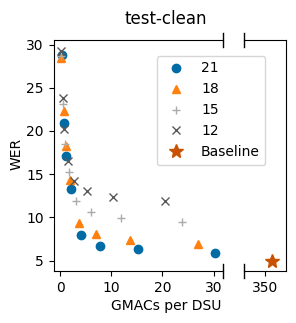

<Figure size 300x300 with 0 Axes>

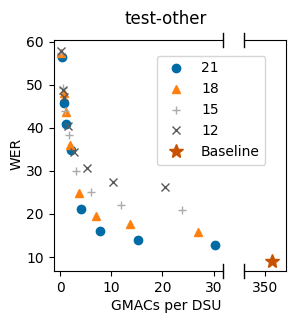

<Figure size 300x300 with 0 Axes>

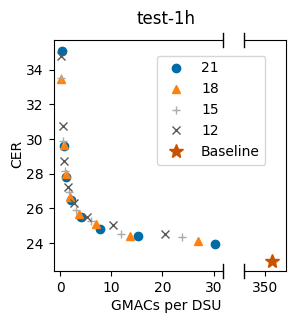

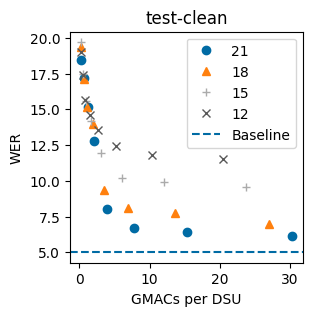

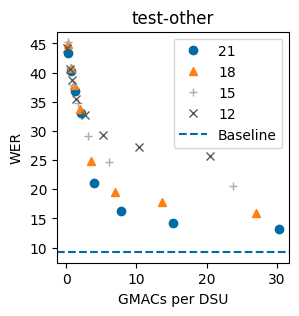

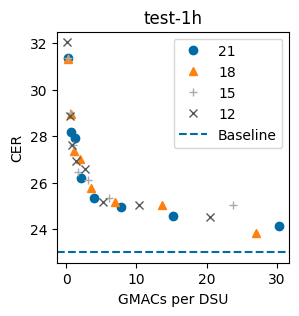

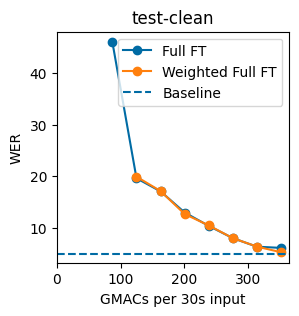

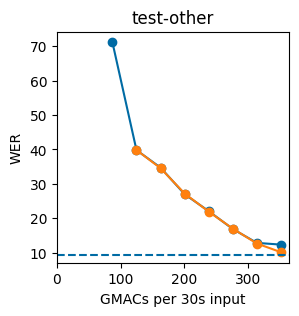

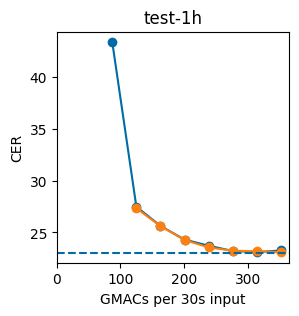

In [6]:
# deprecated

df_21 = pd.read_csv(StringIO("""test-clean	test-other	test-1h
28.81	56.55	35.1
20.91	45.66	29.57
17.07	40.83	27.82
13.23	34.81	26.47
7.96	21.24	25.52
6.63	16.04	24.79
6.32	13.97	24.39
5.91	12.86	23.94"""), sep="\t")

df_18 = pd.read_csv(StringIO("""test-clean	test-other	test-1h
28.45	57.28	33.48
22.37	48	29.66
18.21	43.61	27.96
14.36	35.94	26.66
9.32	24.81	25.7
8.09	19.52	25.09
7.39	17.59	24.39
6.92	15.71	24.1"""), sep="\t")

df_15 = pd.read_csv(StringIO("""test-clean	test-other	test-1h
28.63	57.35	33.54
23.09	49.32	29.91
18.52	43.81	28.17
15.3	38.43	26.93
11.9	29.92	25.91
10.62	25.09	25.28
9.9	22.18	24.52
9.43	20.82	24.36"""), sep="\t")

df_12 = pd.read_csv(StringIO("""test-clean	test-other	test-1h
29.32	57.95	34.77
23.82	48.84	30.77
20.27	47.22	28.75
16.55	40.36	27.24
14.18	34.35	26.29
13.04	30.58	25.49
12.36	27.5	25.02
11.92	26.21	24.52"""), sep="\t")


metric = {"test-clean": "WER", "test-other": "WER", "test-1h": "CER"}
baseline = {"test-clean": 5, "test-other": 9.2, "test-1h": 23}
gmacs_21 = np.array([int(x) for x in "251684480	720792448	1189900416	2128116352	4004548224	7757411968	15263139456	30274594432".split("\t")])
gmacs_18 = np.array([int(x) for x in "226472192	645155584	1063838976	1901205760	3575939328	6925406464	13624340736	27022209280".split("\t")])
gmacs_15 = np.array([int(x) for x in "201259904	569518720	937777536	1674295168	3147330432	6093400960	11985542016	23769824128".split("\t")])
gmacs_12 = np.array([int(x) for x in "176047616	493881856	811716096	1447384576	2718721536	5261395456	10346743296	20517438976".split("\t")])


for i, dataset in enumerate("test-clean	test-other	test-1h".split()):
    plt.figure(figsize=(3, 3))
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(3, 3), gridspec_kw={'width_ratios': [4, 1]})

    plt.suptitle(dataset)
    ax1.plot(gmacs_21 / (10**9), df_21[dataset], "o", label="21")
    ax1.plot(gmacs_18 / (10**9), df_18[dataset], "^", label="18")
    ax1.plot(gmacs_15 / (10**9), df_15[dataset], "+", label="15")
    ax1.plot(gmacs_12 / (10**9), df_12[dataset], "x", label="12")

    ax2.plot([351649760128 / (10**9)], [baseline[dataset]], "*", markersize=10, label="Baseline", c="C5")
    ax2.set_xlim(345, 355)
    ax2.set_xticks([350])
    # ax1.set_ylabel(metric[dataset], x=-4)

    fig.supylabel(metric[dataset], x=-0.02, fontsize=10)

    fig.supxlabel("GMACs per DSU", y=-0.03, fontsize=10)
    fig.legend(loc="upper center", bbox_to_anchor=(0.65, 0.85), ncol=1)
    # if i == 0:

    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax1.yaxis.tick_left()
    ax2.yaxis.tick_right()
    ax2.yaxis.set_ticks_position('none')  # Remove right ticks from ax2

    # Add diagonal break markers (MANUALLY ADJUSTED for 45-degree look)
    # Add diagonal break markers using Axes coordinates
    d = 0.015  # Adjust diagonal marker size
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, lw=1)
    ax1.plot((1, 1), (-2 * d, + 2 * d), **kwargs)
    ax1.plot((1, 1), (1 -2 * d, 1 + 2 * d), **kwargs)
    kwargs.update(transform=ax2.transAxes)  
    ax2.plot((0, 0), (-2 * d, + 2 * d), **kwargs)
    ax2.plot((0, 0), (1-2 * d, 1+ 2 * d), **kwargs)
    # plt.savefig(f"pareto-{dataset}.pdf", bbox_inches="tight")


df_21 = pd.read_csv(StringIO("""test-clean	test-other	test-1h
18.45	43.36	31.36
17.23	40.24	28.19
15.15	36.79	27.93
12.82	33.04	26.18
8.02	21.03	25.34
6.72	16.24	24.97
6.45	14.28	24.56
6.12	13.17	24.13"""), sep="\t")

df_18 = pd.read_csv(StringIO("""test-clean	test-other	test-1h
19.34	44.96	31.33
17.11	40.86	28.96
15.18	37.84	27.37
14	33.75	27.02
9.37	24.83	25.76
8.08	19.45	25.15
7.76	17.85	25.02
6.97	15.88	23.82"""), sep="\t")

df_15 = pd.read_csv(StringIO("""test-clean	test-other	test-1h
19.7	45.2	31.37
17.48	40.7	29
15.57	37.85	27.61
14.17	34.81	26.47
11.98	29.16	26.1
10.21	24.65	25.35
9.91	0	0
9.6	20.58	25.04"""), sep="\t")

df_12 = pd.read_csv(StringIO("""test-clean	test-other	test-1h
19.01	44.19	32.05
17.42	40.54	28.87
15.69	38.7	27.64
14.6	35.54	26.95
13.54	32.64	26.58
12.43	29.28	25.17
11.79	27.19	25.05
11.5	25.63	24.5"""), sep="\t")


metric = {"test-clean": "WER", "test-other": "WER", "test-1h": "CER"}
baseline = {"test-clean": 5, "test-other": 9.2, "test-1h": 23}
gmacs_21 = np.array([int(x) for x in "251684480	720792448	1189900416	2128116352	4004548224	7757411968	15263139456	30274594432".split("\t")])
gmacs_18 = np.array([int(x) for x in "226472192	645155584	1063838976	1901205760	3575939328	6925406464	13624340736	27022209280".split("\t")])
gmacs_15 = np.array([int(x) for x in "201259904	569518720	937777536	1674295168	3147330432	6093400960	11985542016	23769824128".split("\t")])
gmacs_12 = np.array([int(x) for x in "176047616	493881856	811716096	1447384576	2718721536	5261395456	10346743296	20517438976".split("\t")])

for i, dataset in enumerate("test-clean	test-other	test-1h".split()):
    plt.figure(figsize=(3, 3))
    plt.title(dataset)

    plt.plot(gmacs_21 / (10**9), df_21[dataset], "o", label="21")
    plt.plot(gmacs_18 / (10**9), df_18[dataset], "^", label="18")
    mask = df_15[dataset] > 0
    plt.plot(gmacs_15[mask] / (10**9), df_15[dataset][mask], "+", label="15")
    plt.plot(gmacs_12 / (10**9), df_12[dataset], "x", label="12")

    plt.axhline(baseline[dataset], ls="--", label="Baseline")
    plt.ylabel(metric[dataset])

    plt.xlabel("GMACs per DSU")
    # plt.xlim(0)
    # if i == 0:
    plt.legend()
    # plt.savefig(f"pareto-{dataset}.pdf", bbox_inches="tight")

df_ft = pd.read_csv(StringIO("""test-clean	test-other	test-1h
6.11	12.35	23.26
6.34	12.85	23.1
8	16.88	23.21
10.37	22.06	23.72
12.96	26.99	24.31
17.05	34.7	25.63
19.6	39.8	27.48
45.94	71.13	43.35"""), sep="\t")

df_wft = pd.read_csv(StringIO("""test-clean	test-other	test-1h
5.27	10.14	23.09
6.36	12.67	23.18
7.99	16.99	23.24
10.46	21.92	23.55
12.67	27.18	24.27
17.11	34.54	25.6
19.9	39.82	27.33"""), sep="\t")

metric = {"test-clean": "WER", "test-other": "WER", "test-1h": "CER"}
baseline = {"test-clean": 5, "test-other": 9.2, "test-1h": 23}
gmacs = np.array([int(x) for x in """351649760128
313856540416
276063320704
238270100992
200476881280
162683661568
124890441856
87097222144""".split("\n")])

for i, dataset in enumerate("test-clean	test-other	test-1h".split()):
    plt.figure(figsize=(3, 3))
    plt.title(dataset)

    plt.plot(gmacs / (10**9), df_ft[dataset], "o-", label="Full FT")
    plt.plot(gmacs[:-1] / (10**9), df_wft[dataset], "o-", label="Weighted Full FT")

    plt.axhline(baseline[dataset], ls="--", label="Baseline")
    plt.ylabel(metric[dataset])

    plt.xlabel("GMACs per 30s input")
    plt.xlim(0)
    if i == 0:
        plt.legend()
    # plt.savefig(f"layer-sota-{dataset}.pdf", bbox_inches="tight")
